In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes

 ### Reading sierraleone-bumbuna csv from data folder and putting it in df variable in memory

In [26]:
df = pd.read_csv("../data/sierraleone-bumbuna.csv")

In [3]:
df.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [4]:
# df.describe() helps you understand the distribution, spread, and central tendency of your data at a glance.
df.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.100000      68.700000       0.000000   
50%         3.400000      25.300000      85.400000       0.800000   
75%       345.400000      29.400000      96.700000       2.000000   
max      1473.000000      39.900000     100.000000      19.200000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        1.691606       0.363823     133.044668       7.172220   
std         1.617053       0.295000     114.284792       7.535093   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.600000       0.400000     161.500000       6.200000   
75%         2.600000       0.600000     234.100000      12.000000   
max        23.900000       4.100000     360.000000      98.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      999.876469       0.000967       0.004806      32.504263   
std         2.104419       0.031074       0.047556      12.434899   
min       993.000000       0.000000       0.000000      10.700000   
25%       999.000000       0.000000       0.000000      23.500000   
50%      1000.000000       0.000000       0.000000      26.600000   
75%      1001.000000       0.000000       0.000000      40.900000   
max      1006.000000       1.000000       2.400000      72.800000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.593091       NaN  
std        12.009161       NaN  
min        11.100000       NaN  
25%        23.800000       NaN  
50%        26.900000       NaN  
75%        41.300000       NaN  
max        70.400000       NaN

##### Timestamp  is object need to change to datetime

In [8]:
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [27]:
# Convert index (strings) -> DatetimeIndex (coerce errors to NaT)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [28]:
df.dtypes

Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
WD                      float64
WDstdev                 float64
BP                        int64
Cleaning                  int64
Precipitation           float64
TModA                   float64
TModB                   float64
Comments                float64
dtype: object

In [29]:
#getting sum of all null values for each columns
missing = df.isna().sum().sort_values(ascending=False)
missing

Comments         525600
GHI                   0
Timestamp             0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

In [30]:
# calculating Missing percentage for each columns
missing_pct = (missing / len(df) * 100).round(2)
missing_pct

Comments         100.0
GHI                0.0
Timestamp          0.0
DNI                0.0
DHI                0.0
ModB               0.0
ModA               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
Tamb               0.0
WSstdev            0.0
WD                 0.0
BP                 0.0
WDstdev            0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
dtype: float64

In [31]:
# list columns >5% null
cols_over5 = missing_pct[missing_pct > 5].index.tolist()
print("Columns >5% missing:", cols_over5)

Columns >5% missing: ['Comments']


In [32]:
#removing Comments from the df. since it all value is null, no useful information for our analysis
df = df.drop(columns=['Comments'])


### Outlier Detection & Basic Cleaning

# 🧠 Reason for selecting those specific columns

We selected:
**["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]**

because these are the main continuous measurement variables in the dataset — the ones where outliers are **most likely to indicate sensor errors or extreme weather conditions**, rather than just normal variation.

---

## 🔍 1. Why these columns matter for data quality checks

These are all continuous sensor measurements.

Because they record physical quantities (solar radiation, wind speed, etc.), you can easily detect problems by:
1. Looking for **impossible or missing values** (like negative irradiance or 0 during midday).
2. Checking for **extreme spikes (outliers)** that break physical limits.
3. Comparing relationships (e.g., **DHI should not exceed GHI**).

In [33]:
target_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
print(target_cols)

['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


In [17]:
df[target_cols].describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB             WS         WSgust  
count  525600.000000  525600.000000  525600.000000  
mean      198.114691       1.146113       1.691606  
std       288.889073       1.239248       1.617053  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         3.400000       0.800000       1.600000  
75%       345.400000       2.000000       2.600000  
max      1473.000000      19.200000      23.900000

##  Check and clean missing values, outliers, incorrect entries

In [34]:
# Remove rows with negative values in GHI, DNI, or DHI
df = df[(df["GHI"] >= 0) & (df["DNI"] >= 0) & (df["DHI"] >= 0)]

In [35]:
df[target_cols].describe()

GHI            DNI            DHI           ModA  \
count  238872.000000  238872.000000  238872.000000  238872.000000   
mean      445.471047     256.390219     251.600694     449.875422   
std       294.381895     263.173538     141.632581     300.153437   
min         0.000000       0.000000       0.000000       0.000000   
25%       192.200000       3.100000     143.900000     188.300000   
50%       406.100000     166.300000     242.400000     403.900000   
75%       687.400000     485.600000     348.900000     703.800000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB             WS         WSgust  
count  238872.000000  238872.000000  238872.000000  
mean      431.288071       1.568610       2.297283  
std       288.670600       1.225995       1.531143  
min         0.000000       0.000000       0.000000  
25%       180.100000       0.400000       1.400000  
50%       387.800000       1.500000       2.400000  
75%       671.800000       2.400000       3.400000  
max      1473.000000      19.200000      23.900000

In [36]:
# since we don't have missing values for our target cols,  we do nothing to clean missing values
missing_counts = df[target_cols].isna().sum()
print(missing_counts)

GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [21]:
#### outliers

## Boxplots show points outside the whiskers, usually considered outliers.

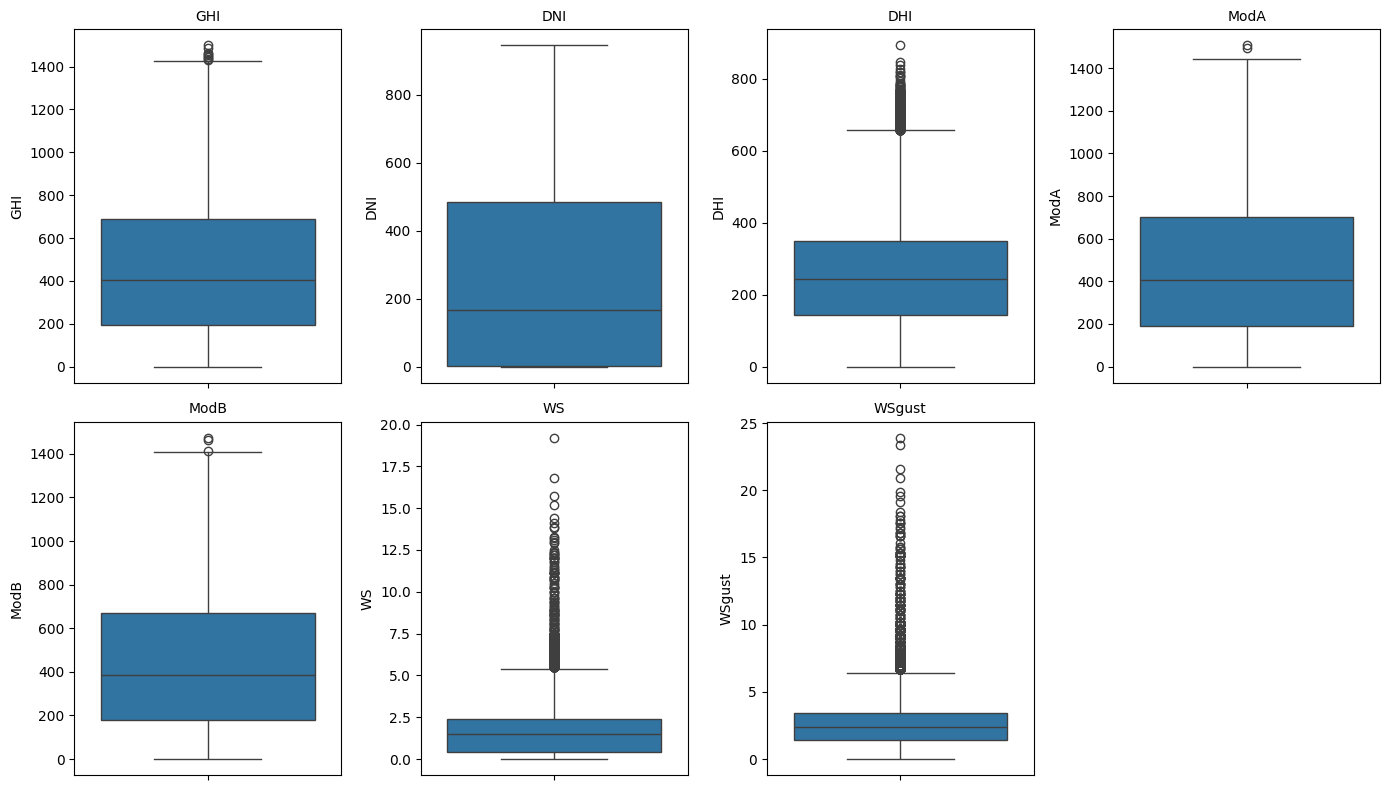

In [37]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(target_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.show()

##### remove outliers

In [38]:
#remove outliers
# Compute z-scores for selected columns
z = np.abs(zscore(df[target_cols], nan_policy="omit"))

# Define a threshold (standard: 3 standard deviations)
threshold = 3
# 4️Keep only rows where all z-scores are below the threshold
df_no_outliers = df[(z < threshold).all(axis=1)]

# --- Remove physical outliers for wind ---
df_no_outliers = df_no_outliers[df_no_outliers["WSgust"] < 20]
df_no_outliers = df_no_outliers[df_no_outliers["WS"] < 15]

# --- Remove extreme statistical outliers for DHI ---
Q1 = df_no_outliers["DHI"].quantile(0.25)
Q3 = df_no_outliers["DHI"].quantile(0.75)
IQR = Q3 - Q1

# Keep rows within the IQR range (allow slightly lenient upper bound)
df_clean = df_no_outliers[(df_no_outliers["DHI"] >= Q1 - 1.5 * IQR) & (df_no_outliers["DHI"] <= Q3 + 3 * IQR)]

# Optional: see how many rows were removed
removed_count = len(df) - len(df_clean)
print(f"Removed {removed_count:,} outlier rows out of {len(df):,} total daytime rows.")

Removed 1,760 outlier rows out of 238,872 total daytime rows.


##### Export cleaned DataFrame to data/<country>_clean.csve


In [40]:
# Export cleaned DataFrame to data/<country>_clean.csve
df_clean.to_csv("../data/sierraleone-bumbuna_clean.csv", index=False)

##### Boxplots after clean

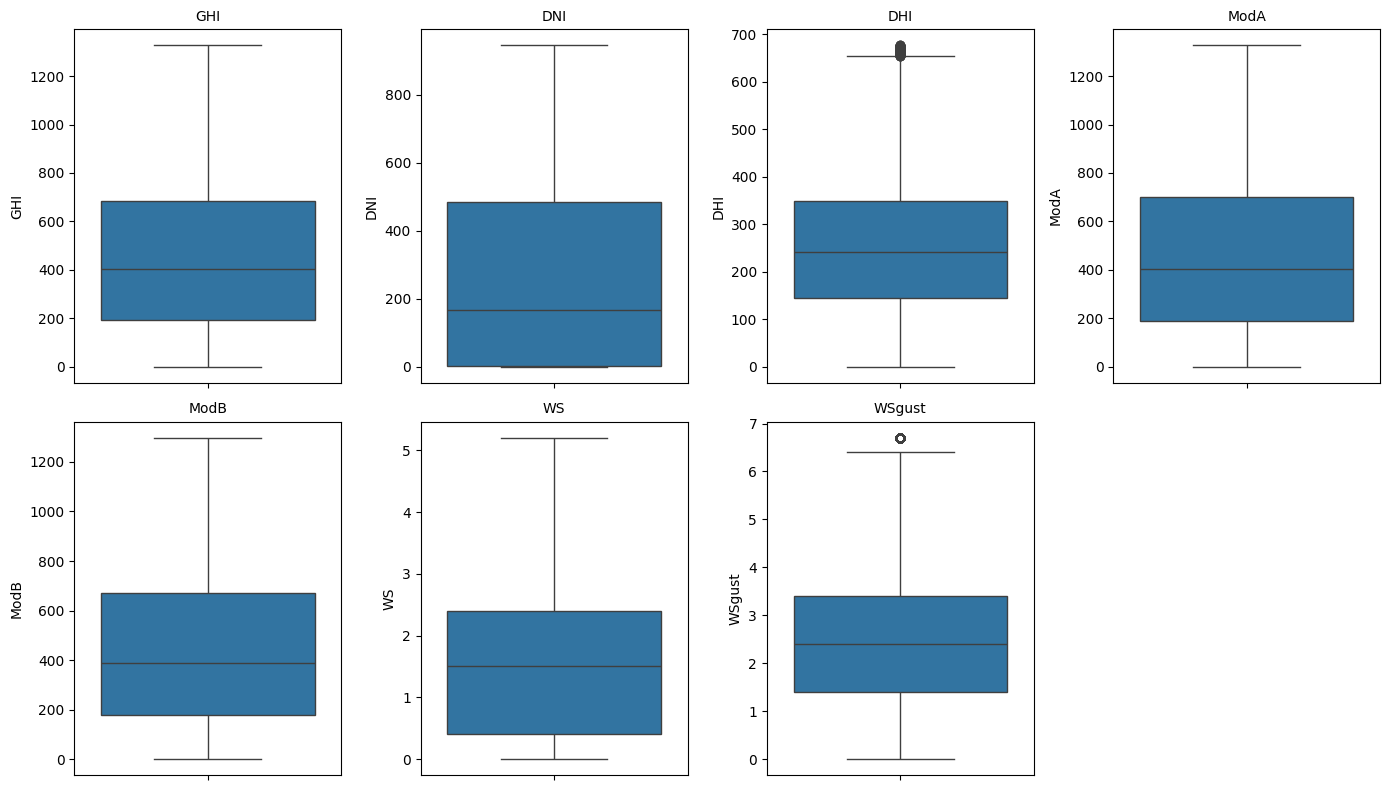

In [42]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(target_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df_clean[col])
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.show()

## Time Series Analysis

<Figure size 1600x800 with 0 Axes>

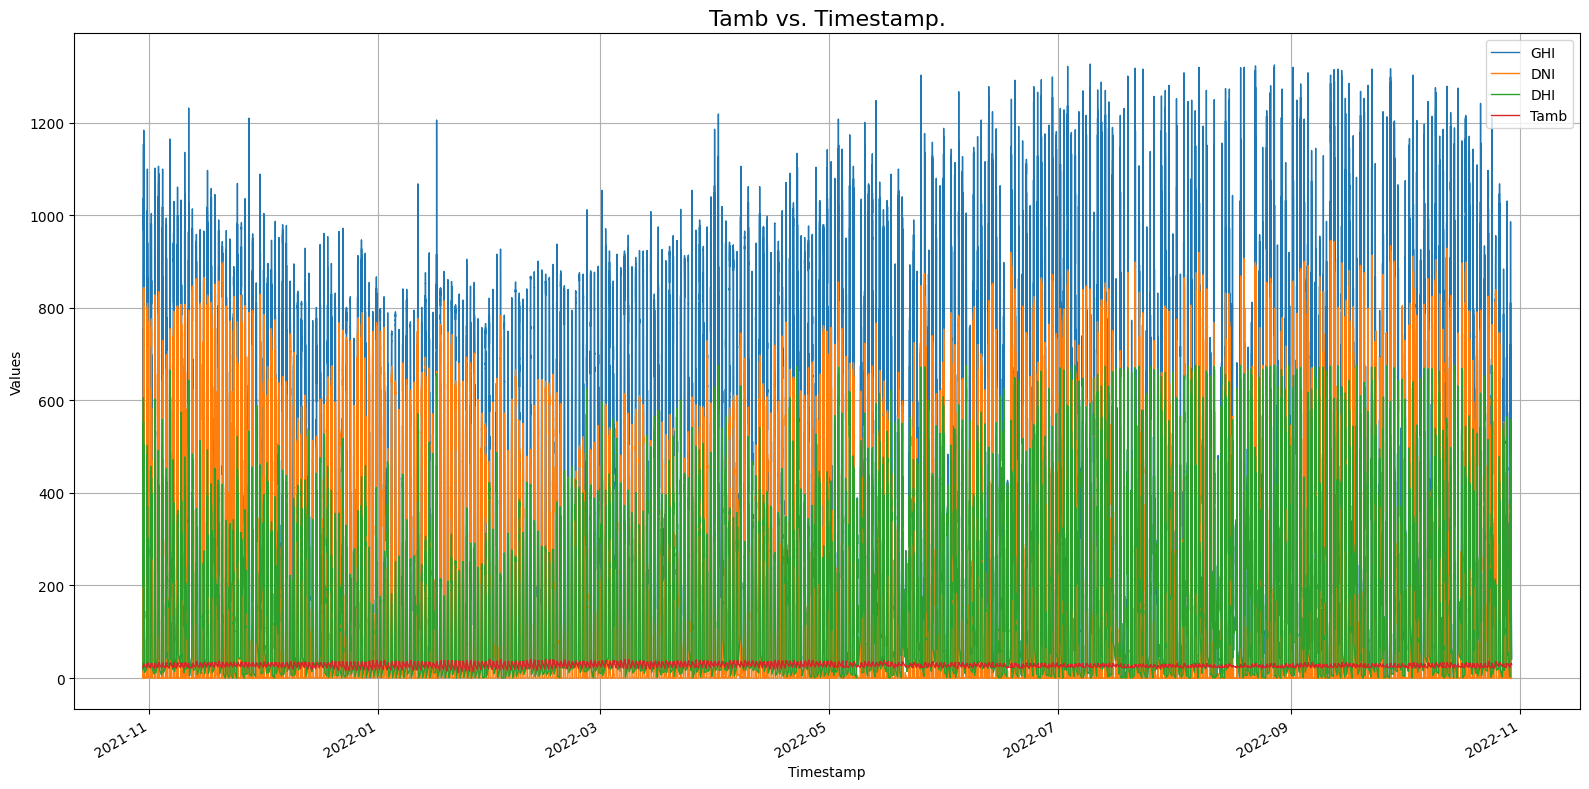

In [43]:
# Set as index (makes time series plotting easier)
df_clean = df_clean.copy()
df_clean.set_index('Timestamp', inplace=True)
# Create a multi-line plot
plt.figure(figsize=(16, 8))

# Plot each variable
df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(16, 8), linewidth=1)

plt.title("Tamb vs. Timestamp.", fontsize=16)
plt.ylabel("Values")
plt.xlabel("Timestamp")
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show();

##### Monthly patterns

C:\Users\hp\AppData\Local\Temp\ipykernel_14944\2161632642.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_clean.resample('M')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()


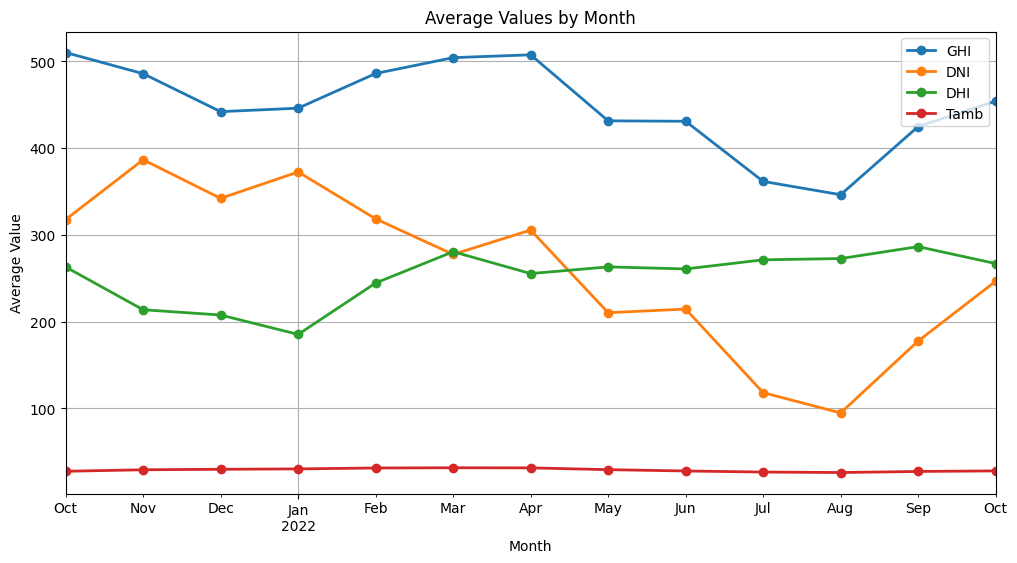

In [45]:
monthly_avg = df_clean.resample('M')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_avg.plot(figsize=(12,6), marker='o', linewidth=2)
plt.title("Average Values by Month")
plt.ylabel("Average Value")
plt.xlabel("Month")
plt.grid(True)
plt.show();

##### Daily patterns (hourly trends)

C:\Users\hp\AppData\Local\Temp\ipykernel_14944\543658982.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_avg = df_clean.resample('H')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()


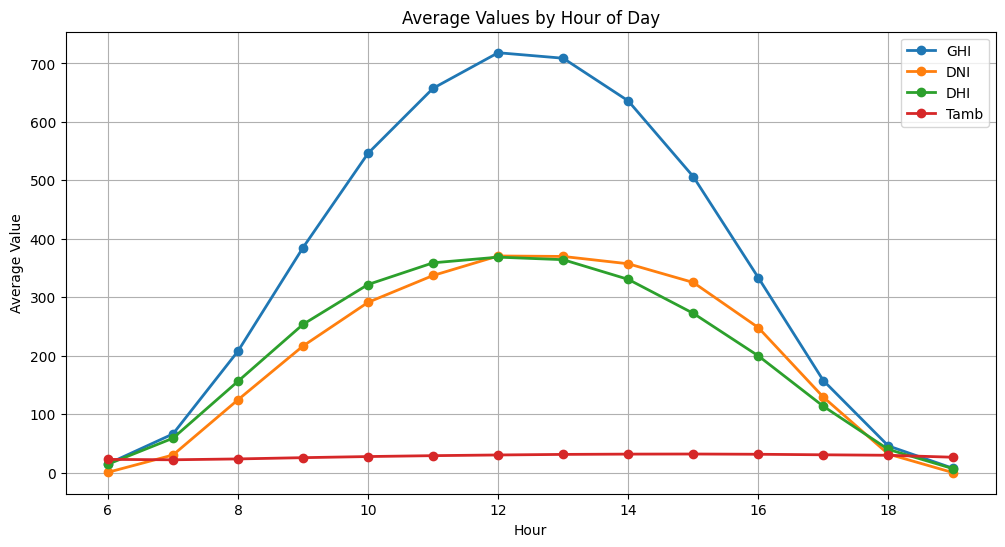

In [46]:
hourly_avg = df_clean.resample('H')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

hourly_avg.groupby(hourly_avg.index.hour).mean().plot(figsize=(12,6), marker='o', linewidth=2)
plt.title("Average Values by Hour of Day")
plt.ylabel("Average Value")
plt.xlabel("Hour")
plt.grid(True)
plt.show();

##### anomalies, such as peaks in solar irradiance or temperature fluctuations.
“Anomalies, such as peaks in solar irradiance or temperature fluctuations” — Explained
When we talk about anomalies in your dataset, we mean data points that behave very differently from the normal pattern.
They can be caused by natural variations, sensor errors, shading events, or atmospheric changes.
Example:
On a clear day, GHI is usually around 900 W/m² at noon.
If one reading suddenly shows 1500 W/m², that’s an anomalous peak.

Detected 394 anomalies (extreme peaks or drops).


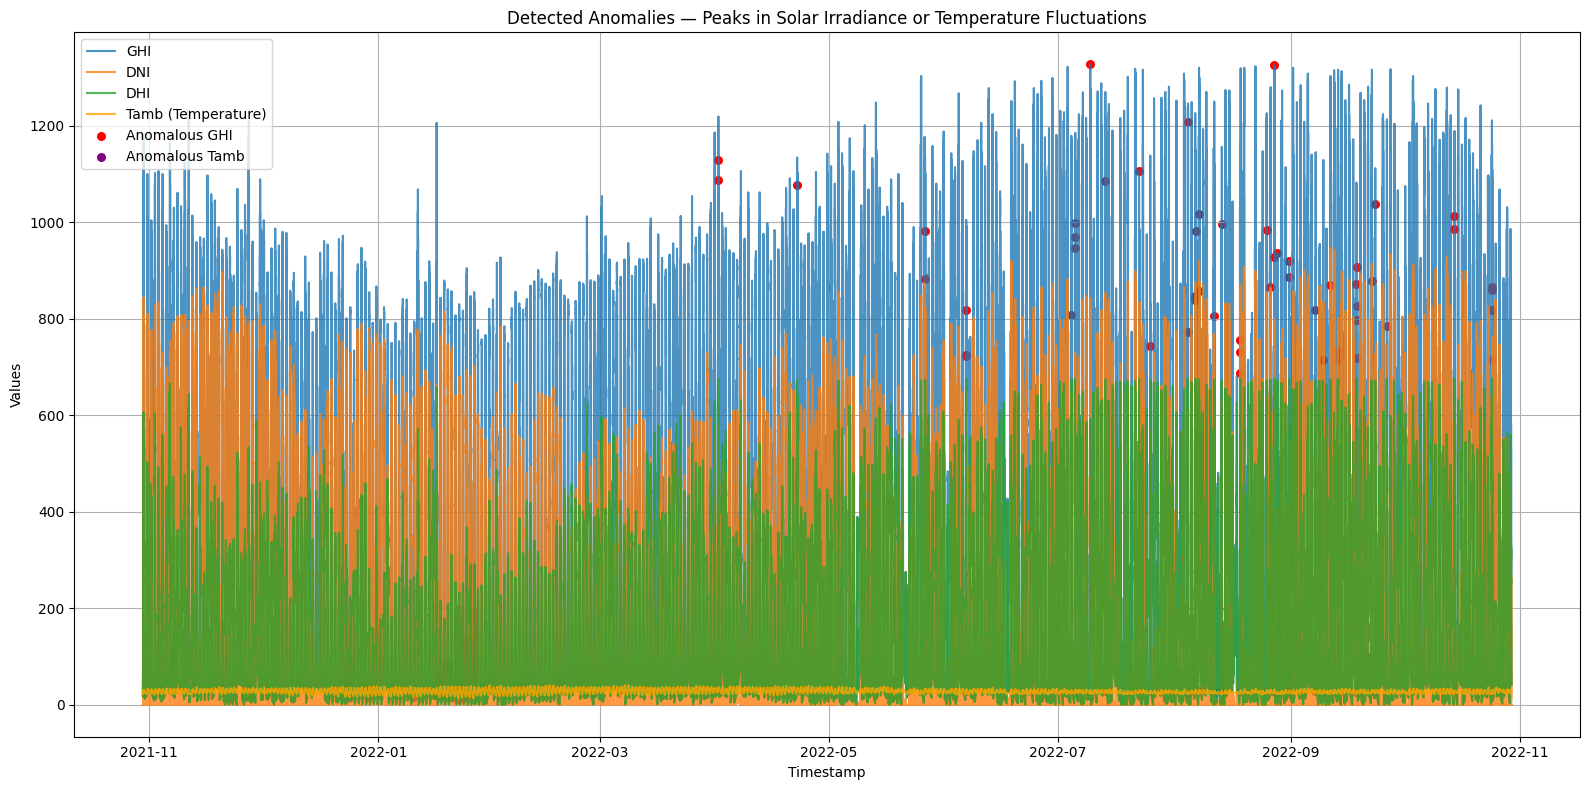

In [48]:
# --- Detect anomalies in solar irradiance and temperature ---
# Compute z-scores for each variable to detect peaks or unusual drops
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    df_clean[f'{col}_zscore'] = zscore(df_clean[col].dropna())
    
# Define anomalies where |z| > 3 (extreme deviations)
anomalies = df_clean[(df_clean['GHI_zscore'].abs() > 3) |
               (df_clean['DNI_zscore'].abs() > 3) |
               (df_clean['DHI_zscore'].abs() > 3) |
               (df_clean['Tamb_zscore'].abs() > 3)]

print(f"Detected {len(anomalies)} anomalies (extreme peaks or drops).")

# --- Plot anomalies for visual inspection ---
plt.figure(figsize=(16,8))
plt.plot(df_clean.index, df_clean['GHI'], label='GHI', alpha=0.8)
plt.plot(df_clean.index, df_clean['DNI'], label='DNI', alpha=0.8)
plt.plot(df_clean.index, df_clean['DHI'], label='DHI', alpha=0.8)
plt.plot(df_clean.index, df_clean['Tamb'], label='Tamb (Temperature)', alpha=0.8, color='orange')

# Highlight detected anomalies
plt.scatter(anomalies.index, anomalies['GHI'], color='red', label='Anomalous GHI', s=30)
plt.scatter(anomalies.index, anomalies['Tamb'], color='purple', label='Anomalous Tamb', s=30)

plt.title("Detected Anomalies — Peaks in Solar Irradiance or Temperature Fluctuations")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();

In [55]:
df2 = pd.read_csv("../data/sierraleone-bumbuna.csv")

## Cleaning Impact

**df2** → your pre-clean data.

**df_clean** → your post-clean data
I’ll update all code and the explanation accordingly.
This version will clearly show how ModA and ModB improved after cleaning by grouping on the "Cleaning flag". 

**Compare ModA & ModB Before vs After Cleaning**

In [56]:
##Step 1 — Label datasets. Mark each dataset with its cleaning stage:
df2['Stage'] = 'Pre-Clean'
df_clean['Stage'] = 'Post-Clean'

In [57]:
# Step 2 — Combine the two datasets Combine them into one DataFrame for comparison:
combined_df = pd.concat([df2, df_clean], axis=0)

In [58]:
# Step 3 — Group by Cleaning flag and Stage Compute the average ModA and ModB values for each cleaning flag and stage:
avg_mods = (
    combined_df
    .groupby(['Cleaning', 'Stage'])[['ModA', 'ModB']]
    .mean()
    .reset_index()
)

print(avg_mods.head())

   Cleaning       Stage        ModA        ModB
0         0  Post-Clean  448.924767  430.321041
1         0   Pre-Clean  206.578599  198.038150
2         1  Post-Clean  279.492480  283.471341
3         1   Pre-Clean  273.309252  277.231102


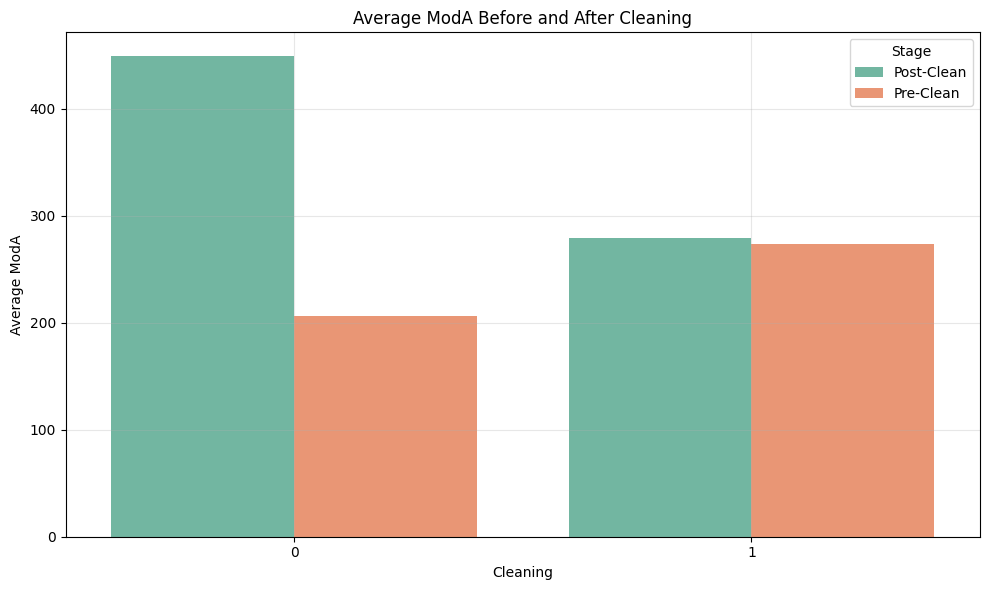

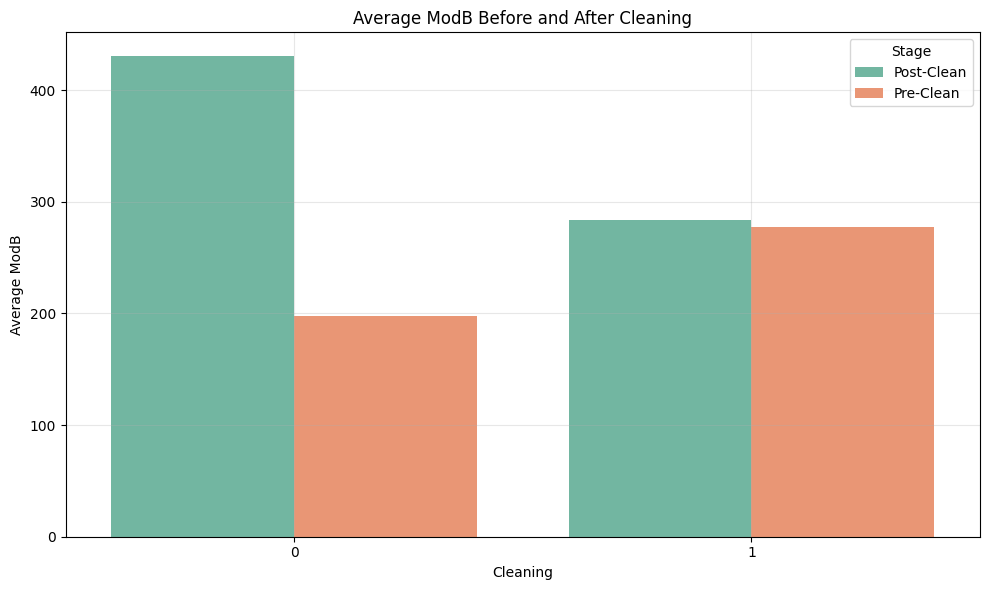

In [59]:
# Step 4 — Plot the comparison (side-by-side bars) Plot average ModA and ModB values for pre-clean vs post-clean:
# Plot ModA
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_mods,
    x='Cleaning', y='ModA', hue='Stage',
    palette='Set2'
)
plt.title("Average ModA Before and After Cleaning")
plt.xlabel("Cleaning")
plt.ylabel("Average ModA")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot ModB
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_mods,
    x='Cleaning', y='ModB', hue='Stage',
    palette='Set2'
)
plt.title("Average ModB Before and After Cleaning")
plt.xlabel("Cleaning")
plt.ylabel("Average ModB")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Correlation & Relationship Analysis

#####  Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).

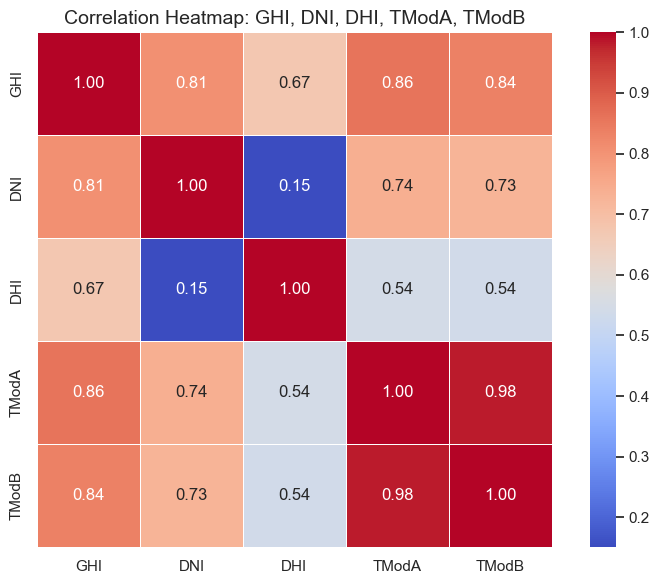

In [64]:
# Select only the relevant columns
cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute the correlation matrix
corr_matrix = df_clean[cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Heatmap: GHI, DNI, DHI, TModA, TModB", fontsize=14)
plt.tight_layout()
plt.show()

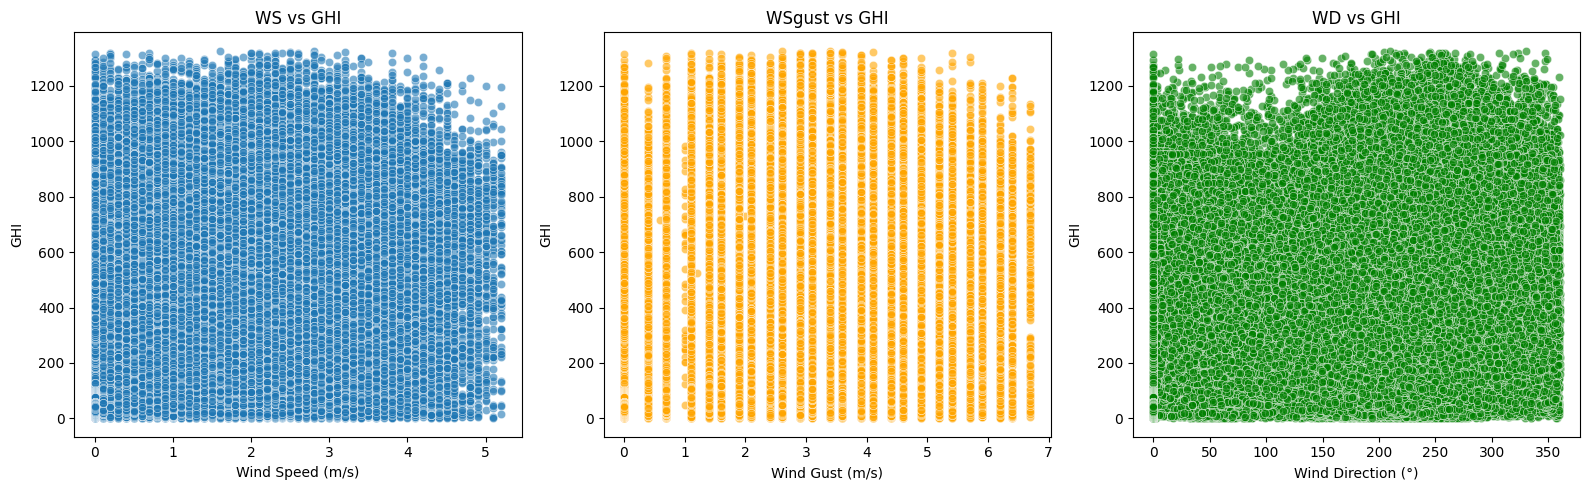

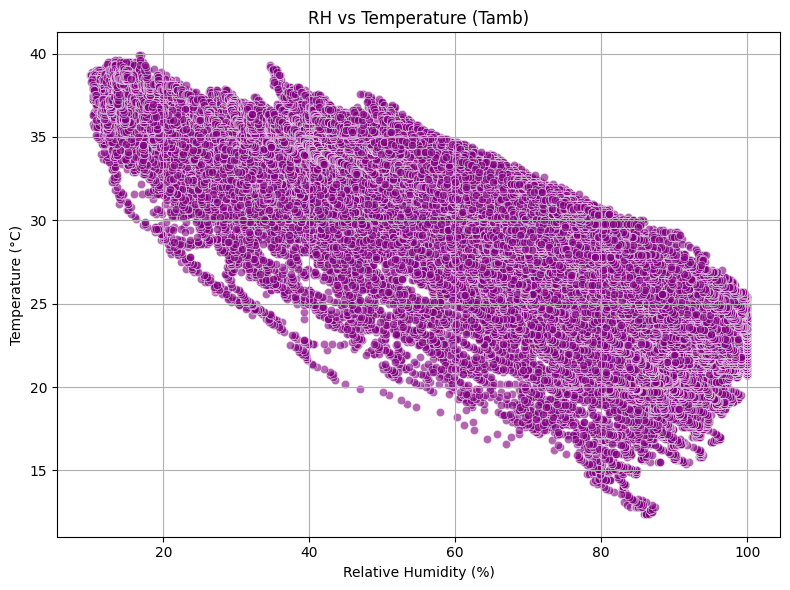

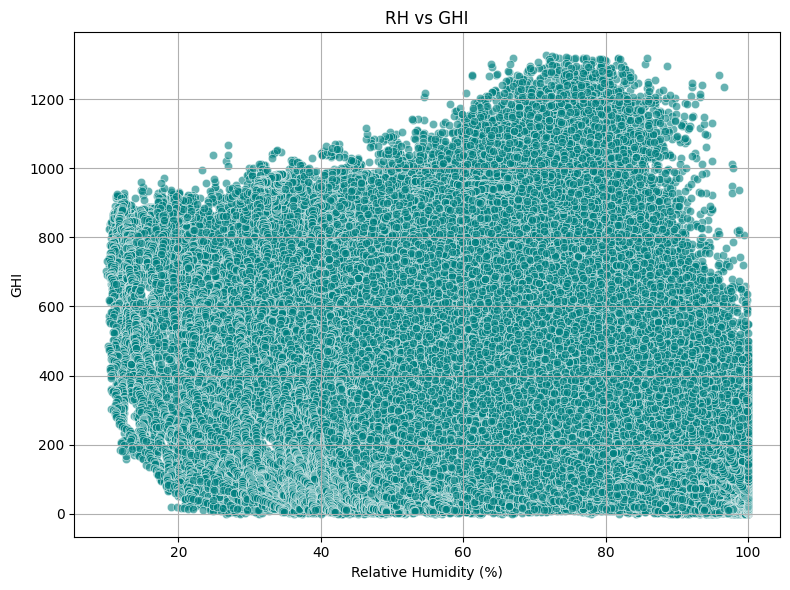

In [61]:
# --- 1) WS, WSgust, WD vs GHI ---
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.scatterplot(data=df_clean, x='WS', y='GHI', alpha=0.6)
plt.title("WS vs GHI")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("GHI")

plt.subplot(1,3,2)
sns.scatterplot(data=df_clean, x='WSgust', y='GHI', alpha=0.6, color='orange')
plt.title("WSgust vs GHI")
plt.xlabel("Wind Gust (m/s)")
plt.ylabel("GHI")

plt.subplot(1,3,3)
sns.scatterplot(data=df_clean, x='WD', y='GHI', alpha=0.6, color='green')
plt.title("WD vs GHI")
plt.xlabel("Wind Direction (°)")
plt.ylabel("GHI")

plt.tight_layout()
plt.show()

# --- 2) RH vs Tamb ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.6, color='purple')
plt.title("RH vs Temperature (Tamb)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3) RH vs GHI ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.6, color='teal')
plt.title("RH vs GHI")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI")
plt.grid(True)
plt.tight_layout()
plt.show()

## Wind & Distribution Analysis
##### Wind rose or radial bar plot of WS/WD.

<Figure size 800x800 with 0 Axes>

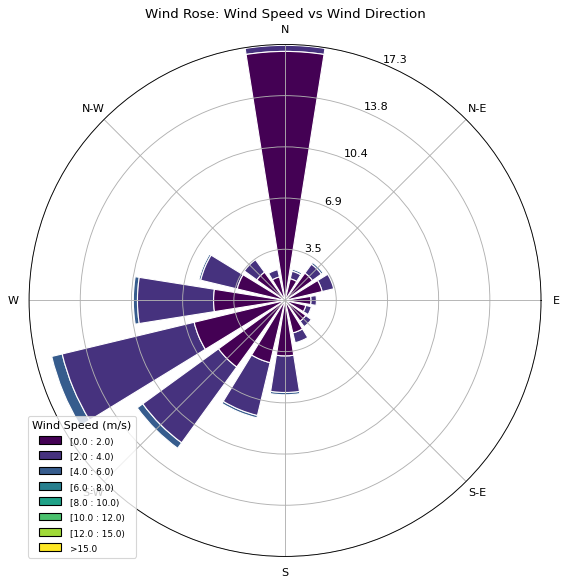

In [62]:
# Extract wind speed and direction
ws = df_clean['WS']
wd = df_clean['WD']

# Create a figure
plt.figure(figsize=(8,8))
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins=[0, 2, 4, 6, 8, 10, 12, 15])
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose: Wind Speed vs Wind Direction")
plt.show();

#####  Histograms for GHI and one other variable (e.g., WS).

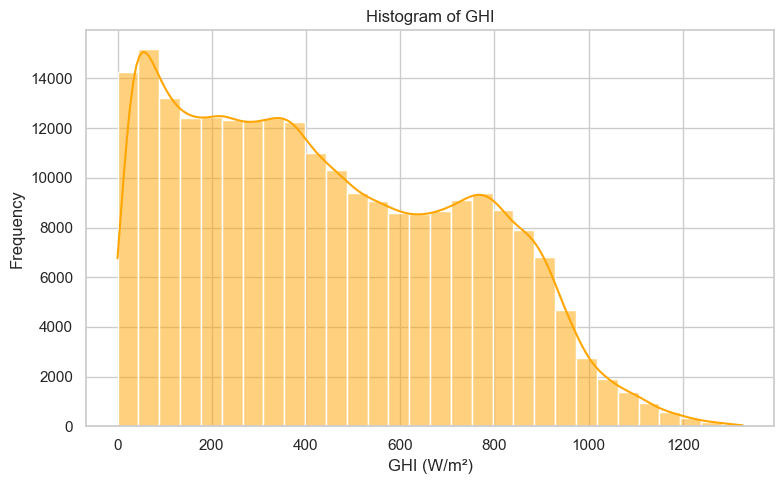

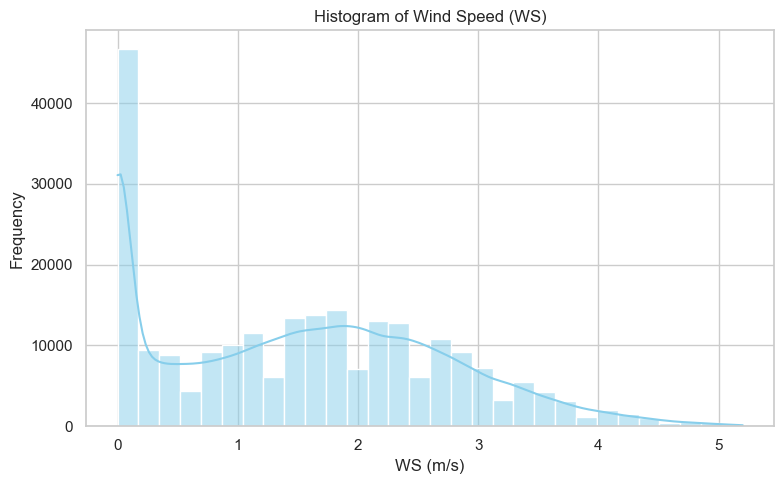

In [63]:
sns.set(style="whitegrid")

# --- Histogram for GHI ---
plt.figure(figsize=(8,5))
sns.histplot(df_clean['GHI'], bins=30, kde=True, color='orange')
plt.title("Histogram of GHI")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Histogram for WS ---
plt.figure(figsize=(8,5))
sns.histplot(df_clean['WS'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Wind Speed (WS)")
plt.xlabel("WS (m/s)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

## Temperature Analysis
##### Examine how relative humidity (RH) might influence temperature readings and solar radiation.

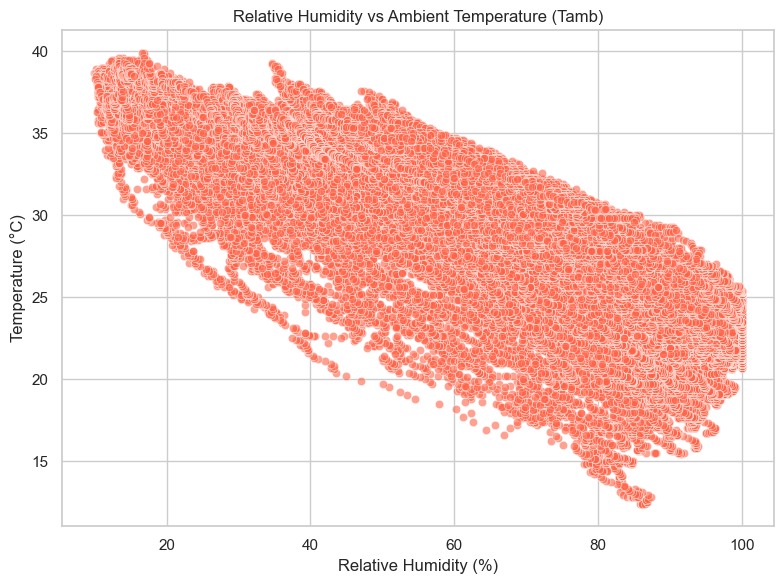

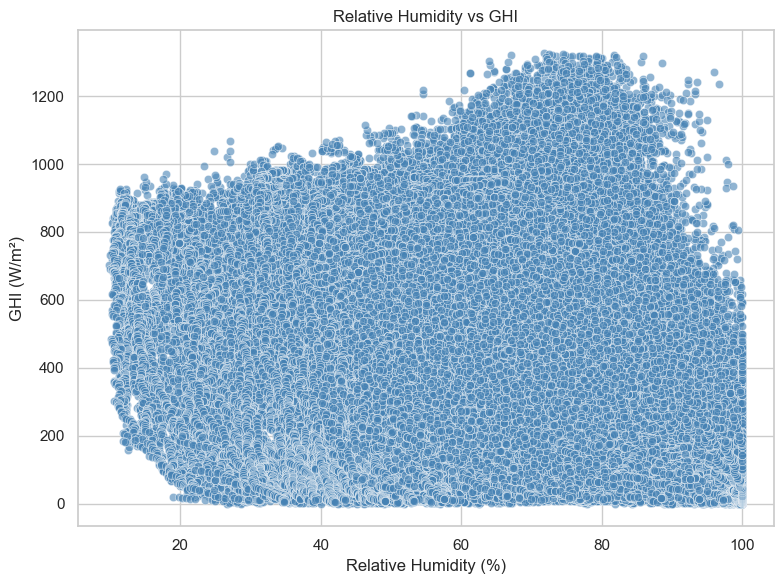

In [65]:
sns.set(style="whitegrid")

# RH vs Temperature (Tamb)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.6, color='tomato')
plt.title("Relative Humidity vs Ambient Temperature (Tamb)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

# RH vs GHI (Global Horizontal Irradiance)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.6, color='steelblue')
plt.title("Relative Humidity vs GHI")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI (W/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### Correlation Coefficients

In [66]:
# Select variables
temp_vars = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']

# Compute correlation matrix
corr_matrix = df_clean[temp_vars].corr()
corr_matrix

RH      Tamb       GHI       DNI       DHI
RH    1.000000 -0.847880 -0.404195 -0.456664 -0.139005
Tamb -0.847880  1.000000  0.471767  0.450887  0.255776
GHI  -0.404195  0.471767  1.000000  0.805795  0.672819
DNI  -0.456664  0.450887  0.805795  1.000000  0.151356
DHI  -0.139005  0.255776  0.672819  0.151356  1.000000

## Bubble Chart


##### GHI vs. Tamb with bubble size = RH or BP.
#### Bubble Chart: GHI vs Tamb with RH as Bubble Size

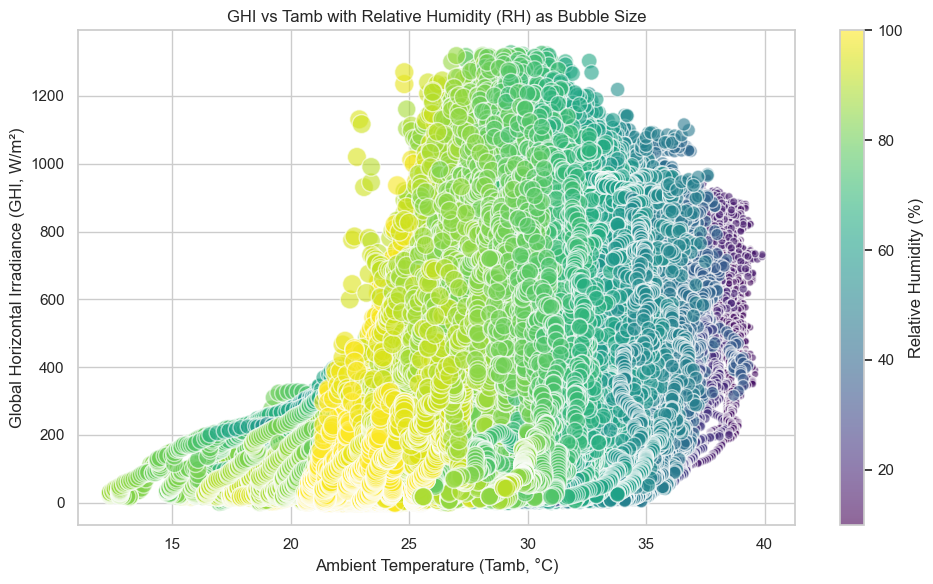

In [67]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

# Bubble chart
plt.scatter(
    x=df_clean['Tamb'], 
    y=df_clean['GHI'],
    s=df_clean['RH']*2,  # Bubble size (scaled)
    alpha=0.6,
    c=df_clean['RH'],    # Bubble color by RH
    cmap='viridis',
    edgecolors='w'
)

plt.xlabel("Ambient Temperature (Tamb, °C)")
plt.ylabel("Global Horizontal Irradiance (GHI, W/m²)")
plt.title("GHI vs Tamb with Relative Humidity (RH) as Bubble Size")
cbar = plt.colorbar()
cbar.set_label("Relative Humidity (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Optional: Bubble Chart using BP (Barometric Pressure) instead of RH

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(
    x=df_clean_with_timestap_index['Tamb'], 
    y=df_clean_with_timestap_index['GHI'],
    s=df_clean_with_timestap_index['BP']/5,  # Bubble size (scaled)
    alpha=0.6,
    c=df_clean_with_timestap_index['BP'],    # Bubble color by BP
    cmap='coolwarm',
    edgecolors='w'
)

plt.xlabel("Ambient Temperature (Tamb, °C)")
plt.ylabel("Global Horizontal Irradiance (GHI, W/m²)")
plt.title("GHI vs Tamb with Barometric Pressure (BP) as Bubble Size")
cbar = plt.colorbar()
cbar.set_label("BP (hPa)")
plt.grid(True)
plt.tight_layout()
plt.show()